In [1]:
using Revise
using Plots

In [2]:
using Lehmann
using JLD2

In [4]:
d = jldopen("sigma.jld2")

JLDFile /Users/kunchen/project/FeynmanDiagram.jl/example/sigma.jld2 (read-only)
 ├─🔢 dlr
 ├─🔢 avg
 └─🔢 std

In [7]:
dlr = d["dlr"];
avg = d["avg"];

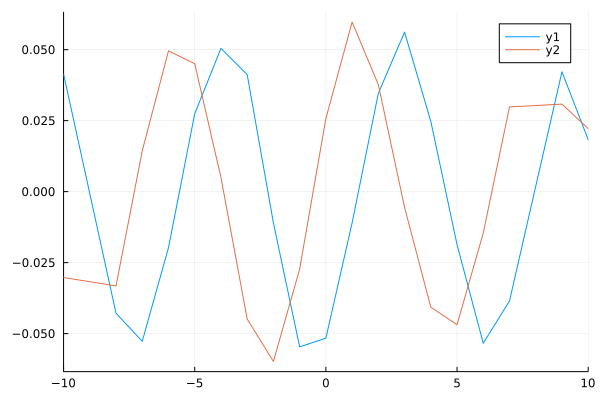

In [9]:
p = plot(dlr.n, real(avg[:, 1, 2]), xlims= (-10, 10))
plot!(dlr.n, imag(avg[:, 1, 2]))